In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
# new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/AuBDA13CH2/run2'
# os.chdir(new_path)

## DFT

(20000, 2)


(-4.0, 4.0)

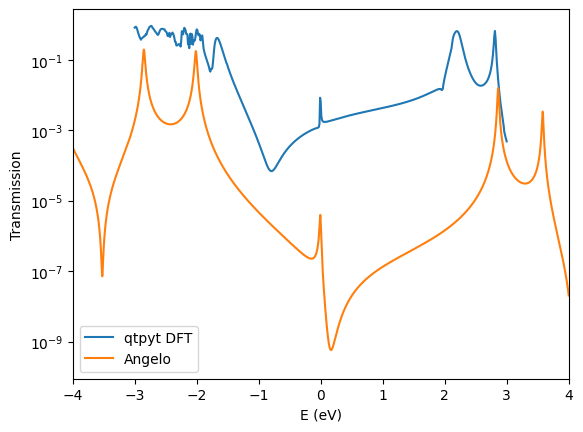

In [20]:
Angelo_dft = np.load("../Angelo_data/dft/Te_landauer.npy")
Angelo_dft = Angelo_dft[0]
print(Angelo_dft.shape)
E,T_dft = np.load("./output/lowdin/dft_transmission.npy")
plt.plot(E, T_dft, label='qtpyt DFT')
plt.plot(Angelo_dft[:,0],Angelo_dft[:,1],label="Angelo")
plt.yscale('log')
plt.legend()
plt.xlabel("E (eV)")
plt.ylabel("Transmission")
plt.xlim(-4,4)
# plt.ylim(bottom=1e-6)

## DMFT

(9, 20000)
(20000,)


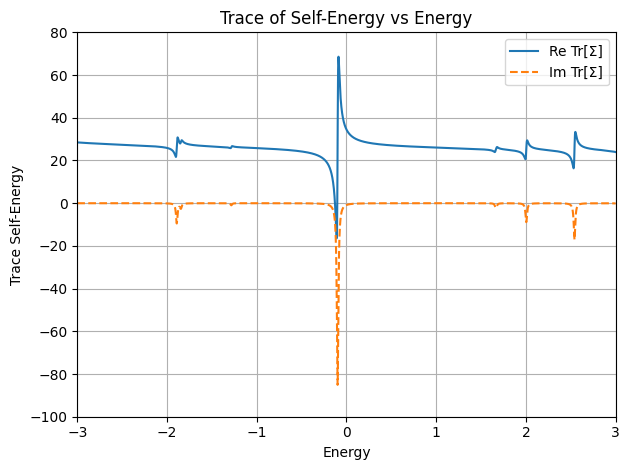

In [21]:
angelo_dmft_self_energy = np.load("../Angelo_data/dmft/self.npy")
angelo_dmft_self_energy = angelo_dmft_self_energy[0]
angelo_energy = np.load("../Angelo_data/dmft/energies.npy")
print(angelo_dmft_self_energy.shape)
print(angelo_energy.shape)

trace_self_energy = np.sum(angelo_dmft_self_energy, axis=0)  # shape (20000,)

# Plot trace vs energy
plt.plot(angelo_energy, trace_self_energy.real, label='Re Tr[Σ]')
plt.plot(angelo_energy, trace_self_energy.imag, label='Im Tr[Σ]', linestyle='--')
plt.xlabel("Energy")
plt.ylabel("Trace Self-Energy")
plt.title("Trace of Self-Energy vs Energy")
plt.xlim(-3, 3.0)
plt.ylim(-100,80)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

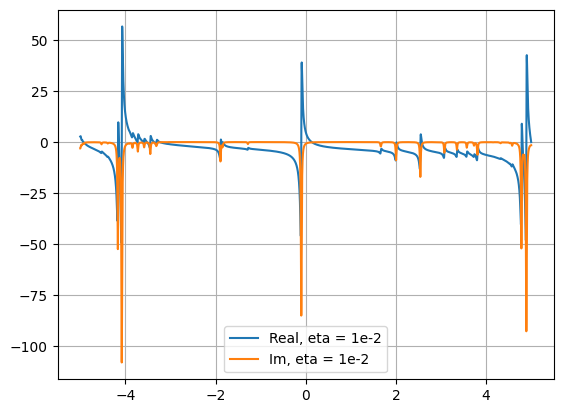

In [22]:
angelo_dmft_self_energy = np.load("../Angelo_data/dmft/self.npy")
angelo_dmft_self_energy = angelo_dmft_self_energy[0]
V = np.loadtxt("output/lowdin/U_matrix.txt")
data_folder = "./output/lowdin"
occupancy_goal = np.load(f"{data_folder}/occupancies.npy")
double_counting = (V.diagonal() * (occupancy_goal - 0.5))
angelo_dmft_self_energy = angelo_dmft_self_energy - double_counting[:, np.newaxis]
trace_se_large = np.sum(angelo_dmft_self_energy,axis=0)
plt.plot(angelo_energy,trace_se_large.real,label="Real, eta = 1e-2")
plt.plot(angelo_energy,trace_se_large.imag,label="Im, eta = 1e-2")
# plt.xlim(-1,1)
# plt.ylim(-10, 10)
plt.grid(True)
plt.legend()
plt.show()

mask = (angelo_energy >= -3) & (angelo_energy <= 3)
filtered_energies = angelo_energy[mask]
filtered_self_energy = angelo_dmft_self_energy[:, mask]
subsampled_self_energy_T = filtered_self_energy.T
self_energy_matrices = np.array([np.diag(vec) for vec in subsampled_self_energy_T])

np.save("../Angelo_data/dmft/subsampled_energies.npy", filtered_energies)
np.save("../Angelo_data/dmft/subsampled_self_energy_with_dcc.npy", self_energy_matrices)